In [68]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [69]:
# Load CSV file
data = pd.read_csv("../datasets/consumo_cerveja_1-1.csv")
# Assume the last column is the target

X = data.iloc[:, :-1].values # Features
y = data.iloc[:, -1].values # Target

feature_names = data.columns[:-1].tolist()

Verificando os dados carregados:

In [70]:
feature_names

['Data',
 'Temperatura_Media',
 'Temperatura_Minima',
 'Temperatura_Maxima',
 'Precipitacao',
 'Final_de_Semana']

In [71]:
X.shape

(365, 6)

In [72]:
y.shape

(365,)

In [73]:
db_df = pd.DataFrame(data, columns=feature_names)

In [74]:
db_df

,Data,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitacao,Final_de_Semana
0,01/01/2015,27.30,23.90,32.50,0.00,0
1,02/01/2015,27.02,24.50,33.50,0.00,0
2,03/01/2015,24.82,22.40,29.90,0.00,1
3,04/01/2015,23.98,21.50,28.60,1.20,1
4,05/01/2015,23.82,21.00,28.30,0.00,0
...,...,...,...,...,...,...
360,27/12/2015,24.00,21.10,28.20,13.60,1
361,28/12/2015,22.64,21.10,26.70,0.00,0
362,29/12/2015,21.68,20.30,24.10,10.30,0
363,30/12/2015,21.38,19.30,22.40,6.30,0


In [75]:
db_df['consumo'] = y

In [76]:
db_df

,Data,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitacao,Final_de_Semana,consumo
0,01/01/2015,27.30,23.90,32.50,0.00,0,25.46
1,02/01/2015,27.02,24.50,33.50,0.00,0,28.97
2,03/01/2015,24.82,22.40,29.90,0.00,1,30.81
3,04/01/2015,23.98,21.50,28.60,1.20,1,29.80
4,05/01/2015,23.82,21.00,28.30,0.00,0,28.90
...,...,...,...,...,...,...,...
360,27/12/2015,24.00,21.10,28.20,13.60,1,32.31
361,28/12/2015,22.64,21.10,26.70,0.00,0,26.09
362,29/12/2015,21.68,20.30,24.10,10.30,0,22.31
363,30/12/2015,21.38,19.30,22.40,6.30,0,20.47


In [77]:
db_df.isna().sum() # verificando valores ausentes

Data                  0
Temperatura_Media     0
Temperatura_Minima    0
Temperatura_Maxima    0
Precipitacao          0
Final_de_Semana       0
consumo               0
dtype: int64

# Análise descritiva

In [78]:
pd.options.display.float_format = '{:.2f}'.format

In [79]:
db_df.describe()

,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitacao,Final_de_Semana,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25.40
std,3.18,2.83,4.32,12.42,0.45,4.40
min,12.90,10.60,14.50,0.00,0.00,14.34
25%,19.02,15.30,23.80,0.00,0.00,22.01
50%,21.38,17.90,26.90,0.00,0.00,24.87
75%,23.28,19.60,29.40,3.20,1.00,28.63
max,28.86,24.50,36.50,94.80,1.00,37.94


In [80]:
db_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Data                365 non-null    object 
 1   Temperatura_Media   365 non-null    float64
 2   Temperatura_Minima  365 non-null    float64
 3   Temperatura_Maxima  365 non-null    float64
 4   Precipitacao        365 non-null    float64
 5   Final_de_Semana     365 non-null    int64  
 6   consumo             365 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB


# Análise gráfica

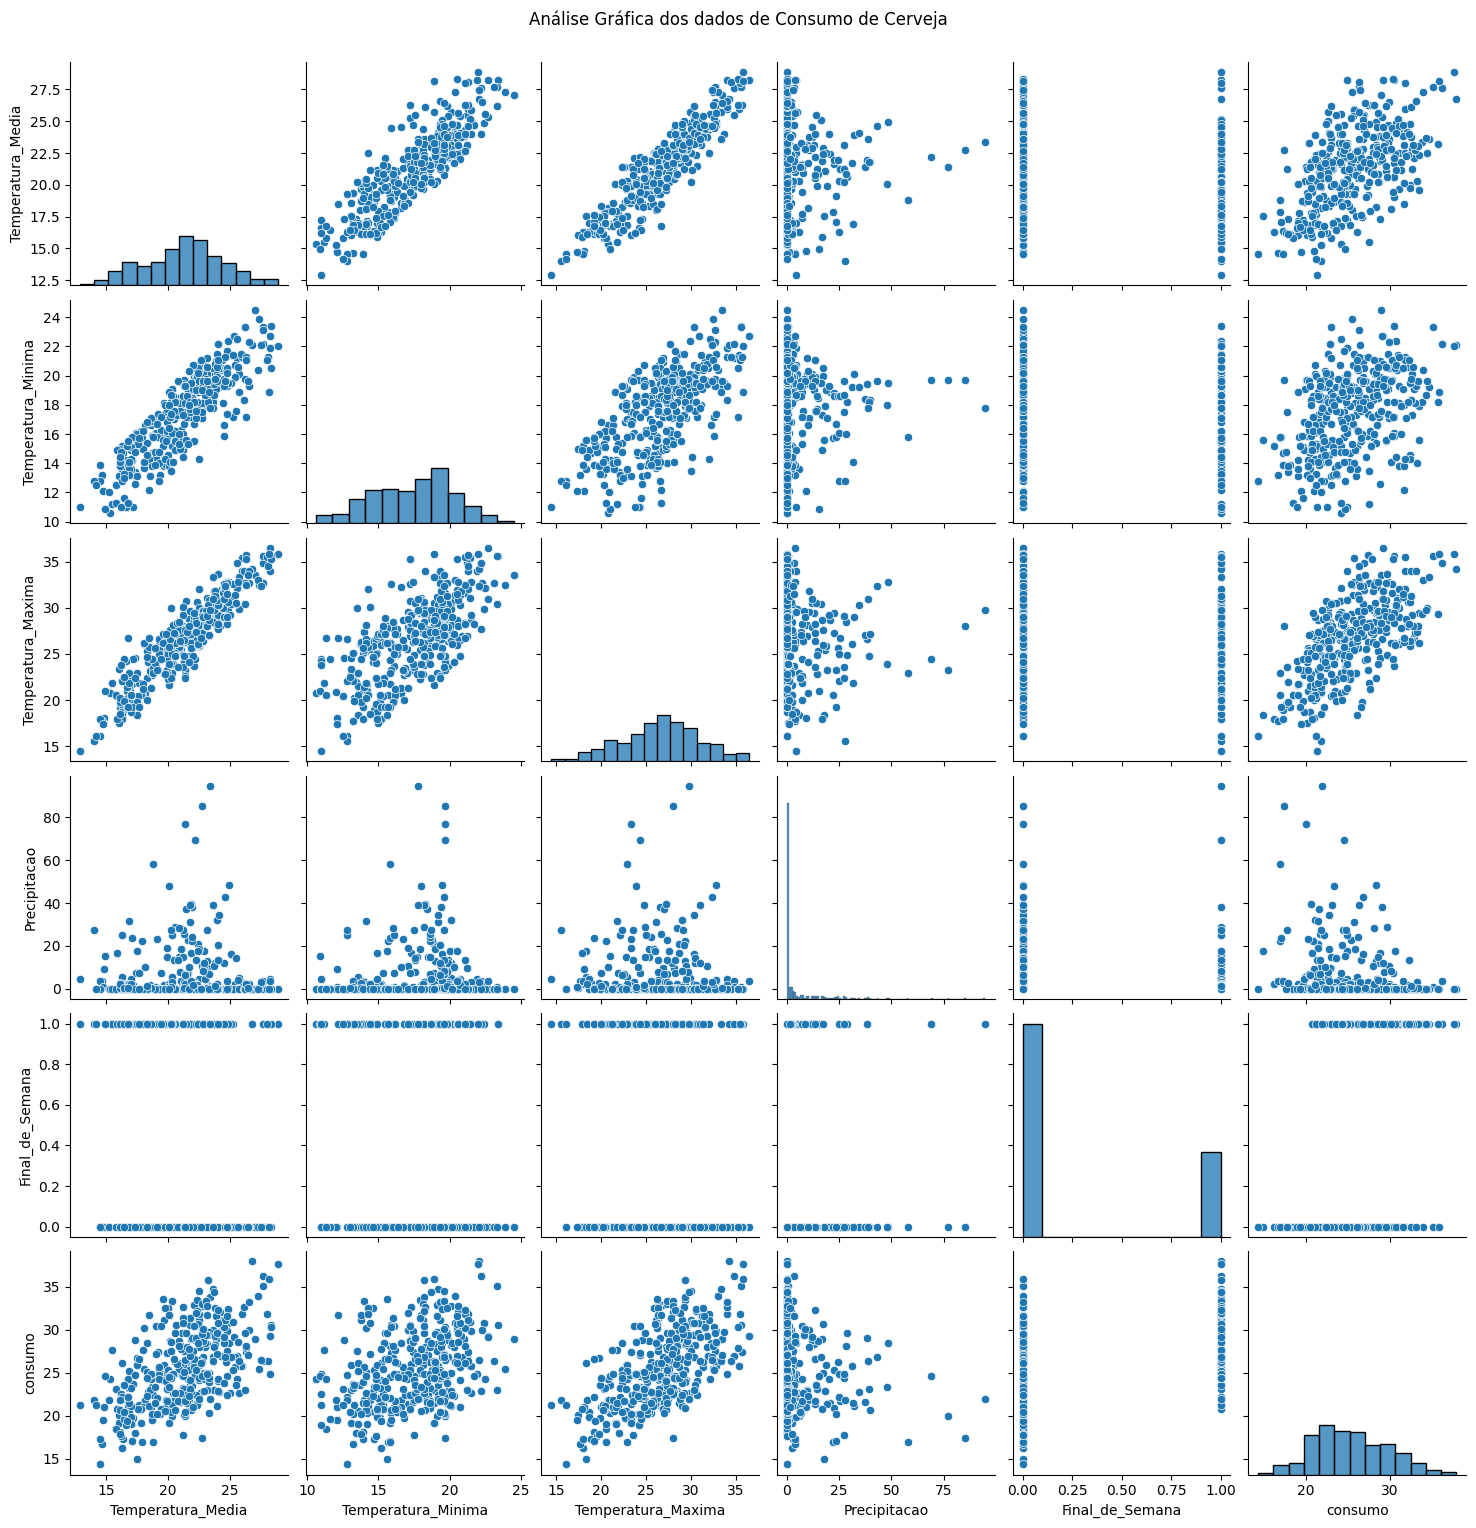

In [81]:
sns.pairplot(db_df)
plt.suptitle("Análise Gráfica dos dados de Consumo de Cerveja", y=1.02)
plt.show()

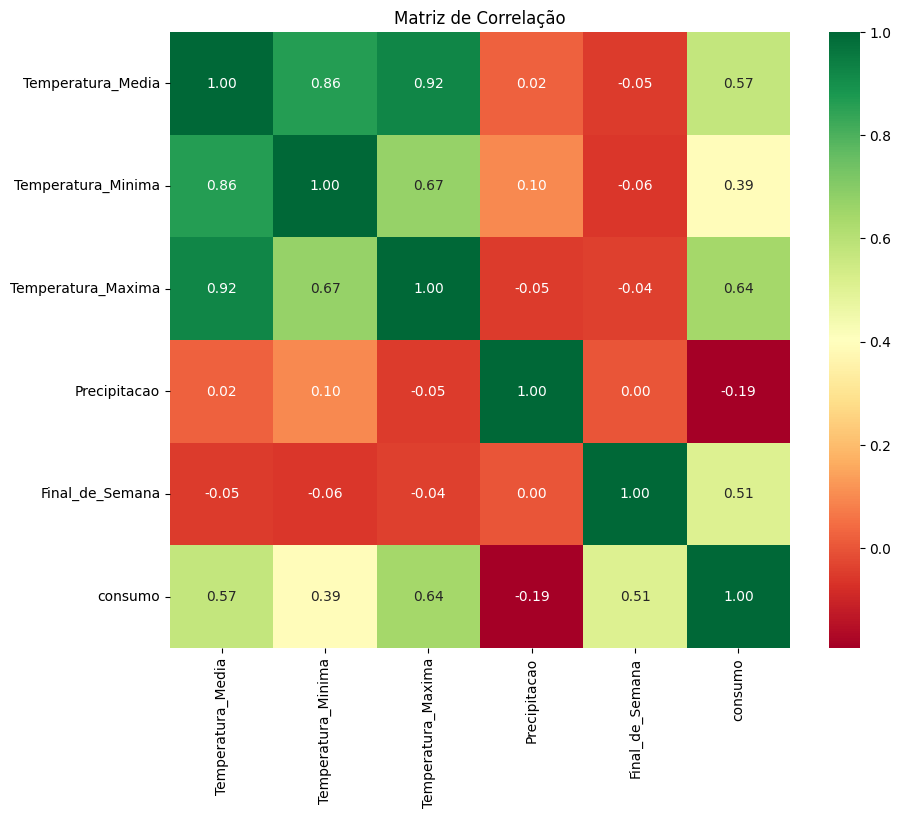

In [82]:
# Correlação entre variáveis
correlation_matrix = db_df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

Maiores correlações com a progressão:
* Temperatura Máxima: 0.64
* Temperatura Média: 0.57
* Final de Semana: 0.51

Criando modelos baseado na correlação das variáveis

In [83]:
db_df.head(0) # para verificar o nome das variáveis

,Data,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitacao,Final_de_Semana,consumo


In [84]:
results = []

Regressão linear simples com a variável mais correlacionada com nossa resposta

In [85]:
lm1 = sm.OLS.from_formula("consumo ~ Temperatura_Maxima", data=db_df)

In [86]:
model_1 = lm1.fit()

In [87]:
print("Análise do Modelo 1:")
print(model_1.summary())
print("=" * 80)

Análise do Modelo 1:
                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       0.413
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                     255.4
Date:                Sat, 10 May 2025   Prob (F-statistic):           6.55e-44
Time:                        16:49:24   Log-Likelihood:                -960.89
No. Observations:                 365   AIC:                             1926.
Df Residuals:                     363   BIC:                             1934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept      

In [88]:
results.append({
    'Modelo': 'Modelo 1',
    'MAE': np.mean(np.abs(y - model_1.predict())),
    'MSE': np.mean((y - model_1.predict())**2),
    'AIC': model_1.aic,
    'BIC': model_1.bic,
    'R²': model_1.rsquared
})

In [89]:
lm2 = sm.OLS.from_formula("consumo ~ Temperatura_Maxima+Temperatura_Media", data=db_df)
model_2 = lm2.fit()
print("Análise do Modelo 2:")
print(model_2.summary())
print("=" * 80)

Análise do Modelo 2:
                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.412
Method:                 Least Squares   F-statistic:                     128.5
Date:                Sat, 10 May 2025   Prob (F-statistic):           6.60e-43
Time:                        16:49:24   Log-Likelihood:                -960.20
No. Observations:                 365   AIC:                             1926.
Df Residuals:                     362   BIC:                             1938.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept      

In [90]:
results.append({
    'Modelo': 'Modelo 2',
    'MAE': np.mean(np.abs(y - model_2.predict())),
    'MSE': np.mean((y - model_2.predict())**2),
    'AIC': model_2.aic,
    'BIC': model_2.bic,
    'R²': model_2.rsquared
})

In [91]:
lm3 = sm.OLS.from_formula("consumo ~ Temperatura_Maxima+Temperatura_Media+Final_de_Semana", data=db_df)
model_3 = lm3.fit()
print("Análise do Modelo 3:")
print(model_3.summary())
print("=" * 80)

Análise do Modelo 3:
                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     277.0
Date:                Sat, 10 May 2025   Prob (F-statistic):           2.89e-93
Time:                        16:49:24   Log-Likelihood:                -840.12
No. Observations:                 365   AIC:                             1688.
Df Residuals:                     361   BIC:                             1704.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept      

In [92]:
results.append({
    'Modelo': 'Modelo 3',
    'MAE': np.mean(np.abs(y - model_3.predict())),
    'MSE': np.mean((y - model_3.predict())**2),
    'AIC': model_3.aic,
    'BIC': model_3.bic,
    'R²': model_3.rsquared
})

In [93]:
lm4 = sm.OLS.from_formula("consumo ~ Temperatura_Maxima+Final_de_Semana", data=db_df)
model_4 = lm4.fit()
print("Análise do Modelo 4:")
print(model_4.summary())
print("=" * 80)

Análise do Modelo 4:
                            OLS Regression Results                            
Dep. Variable:                consumo   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     415.1
Date:                Sat, 10 May 2025   Prob (F-statistic):           2.03e-94
Time:                        16:49:24   Log-Likelihood:                -840.61
No. Observations:                 365   AIC:                             1687.
Df Residuals:                     362   BIC:                             1699.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept      

In [94]:
results.append({
    'Modelo': 'Modelo 4',
    'MAE': np.mean(np.abs(y - model_4.predict())),
    'MSE': np.mean((y - model_4.predict())**2),
    'AIC': model_4.aic,
    'BIC': model_4.bic,
    'R²': model_4.rsquared
})

In [95]:
# Criar um DataFrame com os resultados
results_df = pd.DataFrame(results)

# Imprimir a tabela de resultados
print(results_df)

     Modelo  MAE   MSE     AIC     BIC   R²
0  Modelo 1 2.76 11.33 1925.79 1933.59 0.41
1  Modelo 2 2.76 11.29 1926.39 1938.09 0.42
2  Modelo 3 2.00  5.84 1688.24 1703.83 0.70
3  Modelo 4 2.01  5.86 1687.21 1698.91 0.70
